# Credit Card Payment Default Prediction
Credit card is a flexible tool by which a customer can use a bank's money for a short period of time. Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. Bank cards are the most common credit card type in Taiwan, which emphasizes the impact of risk prediction on both the consumers and banks. This would inform the bank’s decisions on criteria to approve a credit card application and also decide upon what credit limit to provide. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. Using the information given, predict the probability of a customer defaulting in the next month.

# Metadata
ID : Unique ID of each client

LIMIT_BAL : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family (supplementary) credit

SEX : Gender (1=male, 2=female)

EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE : Marital status (1=married, 2=single, 3=divorced)

AGE : Age of the client

PAY_0 : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2 : Repayment status in August, 2005 (scale same as above)

PAY_3 : Repayment status in July, 2005 (scale same as above)

PAY_4 : Repayment status in June, 2005 (scale same as above)

PAY_5 : Repayment status in May, 2005 (scale same as above)

PAY_6 : Repayment status in April, 2005 (scale same as above)

BILL_AMT1 : Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2 : Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3 : Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4 : Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5 : Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6
: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1
: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2
: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3
: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4
: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5
: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6
: Amount of previous payment in April, 2005 (NT dollar)

### Goals 
Our main goal in this project is to predict the wether the customer is going to be default or not. This project could also be use for:
1. Identifying customers who may require closer monitoring to ensure that they do not default on their credit card payments.

2. Making more informed decisions about approving new credit card applications.

3. Identifying trends in credit card default and using this information to improve underwriting and risk management strategies.

4. Improving the overall performance and stability of the financial institution by reducing the risk of credit card default.

5. Helping customers who are at risk of defaulting to take steps to improve their financial situation and avoid default.

### Why is this important?
Predicting credit card default is important because it allows financial institutions to identify potentially high-risk customers and take appropriate actions, such as adjusting credit limits or increasing monitoring, to mitigate potential losses. Additionally, being able to predict credit card default can also help financial institutions make more informed decisions about approving new credit card applications. This can reduce the overall risk of issuing credit to customers who are unlikely to be able to repay their debts, which can help maintain the stability of the financial system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

In [2]:
df = pd.read_csv('train_20D8GL3.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0


# 1. Feature Engineering

First we should understand the data. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

As we can see every columns have integer data type and there is no null values.

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14949.183667,167214.746667,1.607571,1.854190,1.551714,35.461619,-0.01119,-0.127238,-0.164857,-0.21819,-0.260952,-0.288667,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762,0.221190
std,8632.775153,128965.188482,0.488303,0.791628,0.521176,9.206628,1.12321,1.198957,1.198624,1.17221,1.141454,1.151592,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697,0.415058
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.00000,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7508.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000,0.000000
50%,14939.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22386.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000,0.000000
max,29998.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000,1.000000


In [8]:
# ID is unique for every row so we can delete it. In the other hand, we can use index to identify every row
df.drop('ID',axis=1,inplace=True)

In [9]:
# We can classify the data between categorical, numerical, and target values
categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
         'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = 'default_payment_next_month'

In [10]:
df[categorical].head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,2,-1,-1,-1,-1,-1,-1
1,2,1,2,2,2,-2,-1,0,-1
2,2,2,1,0,0,0,0,0,0
3,2,2,2,-1,-1,-2,-2,-2,-2
4,1,3,1,-1,0,0,0,0,0


In [11]:
df[numerical].head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043
1,240000,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074
2,320000,41,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500
3,50000,24,2675,0,0,0,0,0,0,0,0,0,0,0
4,80000,52,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449


### Categorical Values

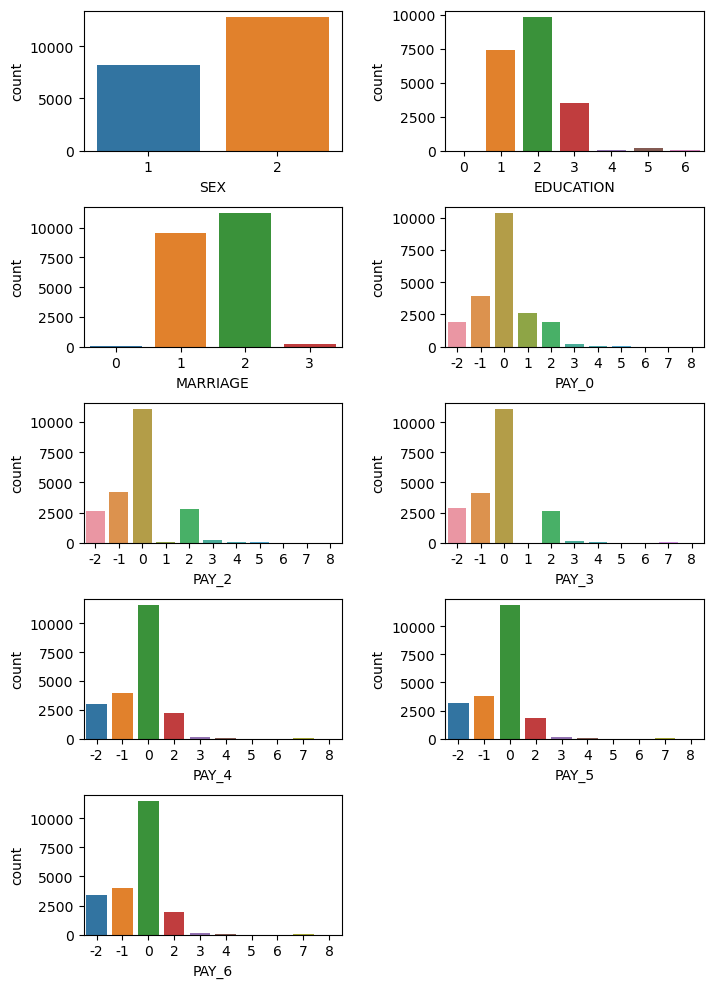

In [12]:
# Make a count plot for categorical values
plt.figure(figsize=(8, 12))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for n, feature in enumerate(categorical):
    ax = plt.subplot(5, 2, n + 1)
    sns.countplot(x = df[feature])

We want to change SEX column so that the encoded number start from 0. Also, it really weird that there is 0 values in EDUCATION and MARRIAGE columns.

In [13]:
df['SEX']= df['SEX'].apply(lambda x : 0 if x==2 else x)

In [14]:
df[df['EDUCATION']==0].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
873,200000,1,0,2,40,1,-2,-1,-1,-1,-2,0,0,200,1000,0,0,0,200,1000,0,0,0,0
7497,290000,0,0,2,38,1,-1,-1,-1,-1,-1,0,1437,3070,1406,2196,1481,1437,3078,1406,2196,1481,0,0
8305,210000,1,0,2,45,-2,-2,-2,-2,-2,-2,2563,5854,1032,788,3499,3372,5854,1032,788,3565,3372,15381,0
9022,50000,0,0,1,40,0,0,0,0,0,0,44749,46229,46798,47647,40500,41921,2229,2298,2100,2500,1921,8432,0
9718,270000,1,0,2,39,1,-1,-1,-1,-1,-2,0,10193,69553,18607,0,0,10193,70213,19008,399,0,0,0


EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)<br>
As we can see, 5 and 6 are classified as unknown and there is 0 that is not classified as anything so I wanted to classified 0,5,6 as others and encoded it as 0

In [15]:
df['EDUCATION']= df['EDUCATION'].apply(lambda x : 0 if x==5 or x==6 or x==4 else x)

In [16]:
df[df['MARRIAGE']==0].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
439,80000,0,3,0,37,-2,-2,-2,-2,-2,-2,600,0,0,0,0,0,0,0,0,0,0,0,0
1068,200000,1,3,0,36,-2,-2,-2,-2,-2,-2,5644,82620,14129,41359,9140,0,89187,14178,41359,9140,0,0,0
1476,110000,0,3,0,31,0,0,0,0,0,0,89989,84229,79288,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
1624,50000,0,1,0,45,-1,-1,-2,-2,-1,2,4736,0,0,0,4881,4634,0,0,0,4881,0,0,0
1766,50000,1,3,0,50,0,0,0,0,0,0,9404,10745,12058,13256,14437,16985,1500,1500,1400,1400,2800,0,0


For marriage column we can keep it like this and assume 0 for new categorical values

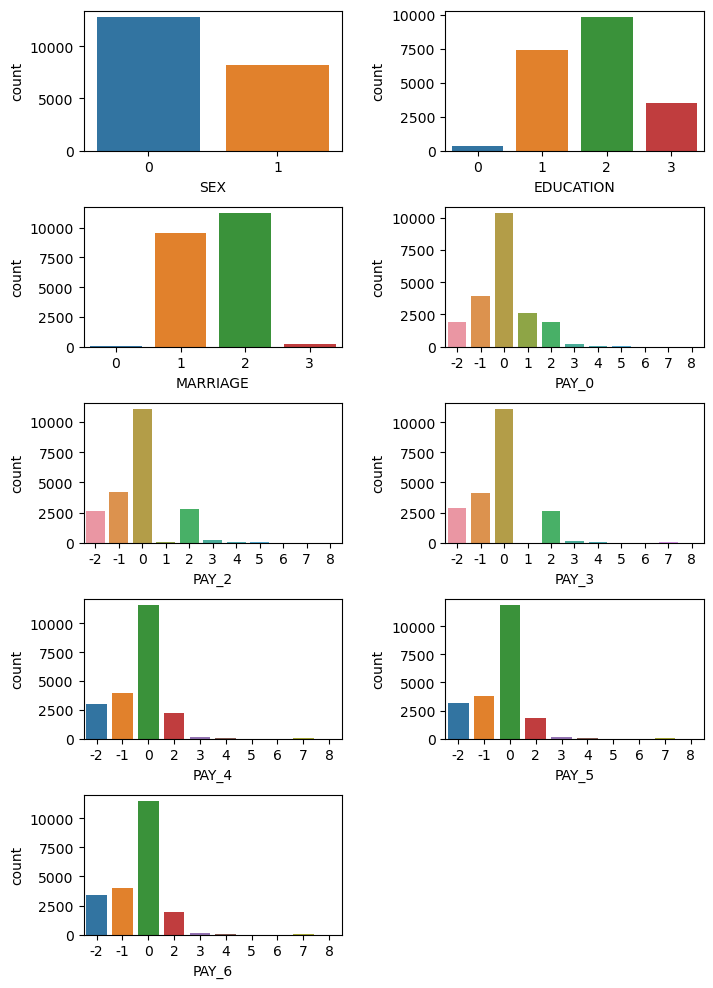

In [17]:
# Make a count plot for categorical values
plt.figure(figsize=(8, 12))
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for n, feature in enumerate(categorical):
    ax = plt.subplot(5, 2, n + 1)
    sns.countplot(x = df[feature])

SEX : Gender (0=female, 1=male)

EDUCATION : (0=others, 1=graduate school, 2=university, 3=high school)

MARRIAGE : Marital status (1=married, 2=single, 3=divorced)

### Numerical Values

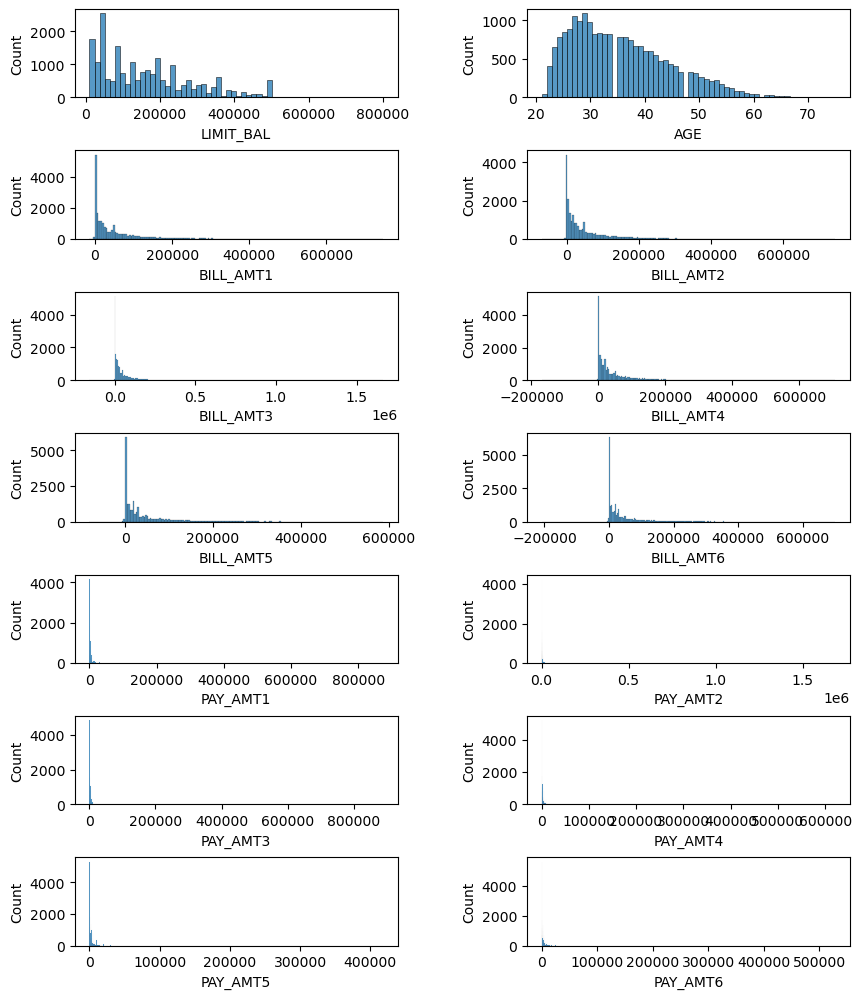

In [18]:
# Make a histogram for categorical values
plt.figure(figsize=(10, 14))
plt.subplots_adjust(hspace=0.6,wspace=0.4)
for n, feature in enumerate(numerical):
    ax = plt.subplot(8, 2, n + 1)
    sns.histplot(df[feature])

It look like all columns are skewed and have many outliers

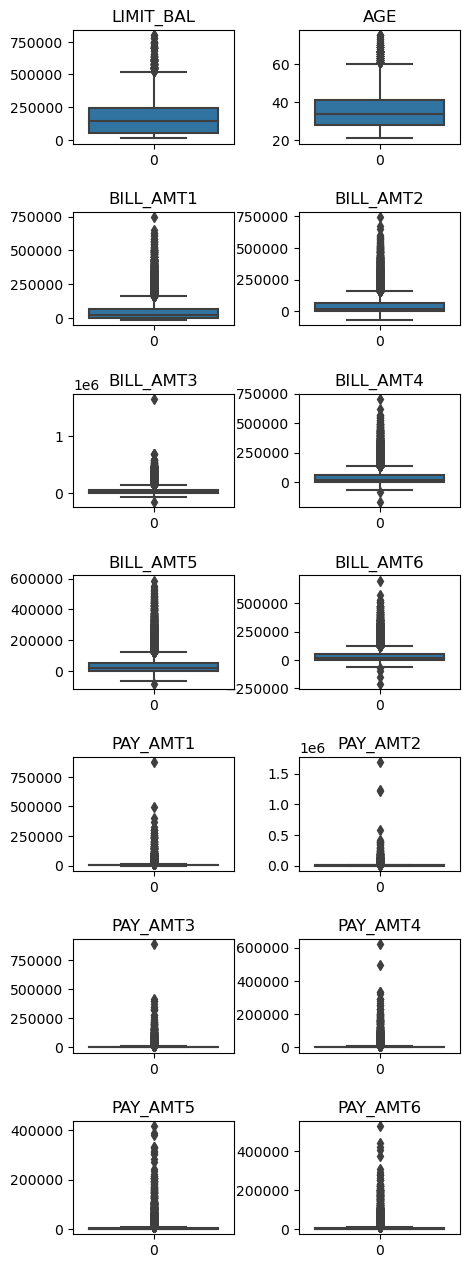

In [19]:
# Make a boxplot for categorical values
plt.figure(figsize=(5, 18))
plt.subplots_adjust(hspace=0.6,wspace=0.4)
for n, feature in enumerate(numerical):
    ax = plt.subplot(8, 2, n + 1)
    sns.boxplot(df[feature])
    plt.title(feature)

All of the numerical data is skewed and we have to handle it since we want to make a logistic regression model. The data is really skewed and have so many outliers so the least we can do is to handle the ouliers by replacing the value of outliers by 0.75 quantile + iQR * 1.5

In [20]:
for f in numerical:
    IQR=df[f].quantile(0.75)-df[f].quantile(0.25)
    upper_bridge=df[f].quantile(0.75)+(IQR*1.5)
    df.loc[df[f]>=upper_bridge,f]=upper_bridge

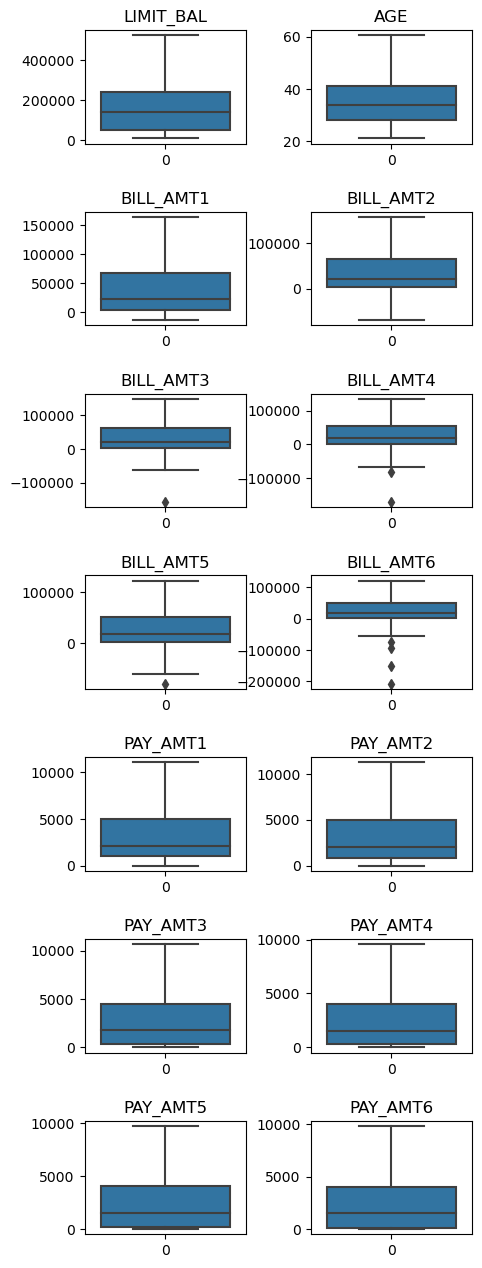

In [21]:
# Make a boxplot for categorical values
plt.figure(figsize=(5, 18))
plt.subplots_adjust(hspace=0.6,wspace=0.4)
for n, feature in enumerate(numerical):
    ax = plt.subplot(8, 2, n + 1)
    sns.boxplot(df[feature])
    plt.title(feature)

### Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()
scaler.fit(df[numerical])

MinMaxScaler()

In [52]:
df_num = pd.DataFrame(scaler.transform(df[numerical]),columns=numerical)

### One Hot Encoding

In [54]:
for c in [categorical]:
    df[c] = df[c].astype('str')

In [56]:
df_ohe = pd.get_dummies(df[categorical],drop_first=True)

In [57]:
df_clean = pd.concat([df_num, df_ohe,df['default_payment_next_month']], axis=1, join='inner')

In [58]:
df_clean

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default_payment_next_month
0,0.679612,0.101266,0.197718,0.361937,0.526506,0.568744,0.440044,0.637977,1.000000,0.309354,0.323113,0.925924,0.206840,1.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.446602,0.632911,0.083042,0.306614,0.515110,0.564825,0.404974,0.638723,0.000000,0.000000,0.210033,0.000000,0.232132,0.312176,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.601942,0.506329,0.359381,0.543071,0.641926,0.673596,0.567690,0.740499,0.452049,0.177841,0.187529,0.313165,0.307188,0.152331,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.077670,0.075949,0.095457,0.306614,0.515110,0.557480,0.396773,0.631871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0.135922,0.784810,0.281134,0.387999,0.578605,0.624905,0.500491,0.696726,0.135615,0.133381,0.140647,0.107311,0.089699,0.147151,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,0.077670,0.253165,0.080490,0.306614,0.515110,0.557480,0.396773,0.631871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
20996,0.135922,0.405063,0.470840,0.628257,0.659869,0.706550,0.634245,0.782682,0.452049,0.266762,0.187529,0.417553,0.204792,0.203108,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
20997,0.174757,0.784810,0.200834,0.398352,0.594121,0.634346,0.537479,0.726638,0.000000,0.320114,0.000000,0.626329,0.307188,0.000000,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
20998,0.155340,0.658228,0.239821,0.432807,0.609597,0.651749,0.539108,0.720892,0.180820,0.177841,0.187529,0.208776,0.204792,0.203108,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Split the data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df_clean.drop('default_payment_next_month',axis=1)
y = df_clean['default_payment_next_month']

In [61]:
X_fulltrain, X_test, y_fulltrain,y_test = train_test_split(X,y,test_size=0.2)
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.25)

In [62]:
X_train.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

# Feature Selction

We split the data first and apply feature selection to X_train to avoid overfitting.

### Correlation

In [63]:
X_train.corr()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
LIMIT_BAL,1.000000,0.144555,0.198627,0.191776,0.197151,0.208119,0.211562,0.202842,0.332349,0.350867,0.348981,0.349231,0.350882,0.370908,-0.022861,0.242851,-0.133949,-0.137924,0.110423,-0.096646,-0.059069,0.199557,-0.100589,-0.054212,-0.131999,-7.307782e-02,-0.033404,-0.022936,-0.008910,-0.007453,-0.020839,0.195115,-0.119306,-0.002224,-0.178819,-0.064223,-0.048435,-0.026519,-0.008511,-0.020839,-0.007919,0.184826,-0.123741,-0.004786,-0.184143,-0.068553,-0.040966,-0.007004,-0.022869,-0.021783,-0.008546,0.169533,-0.119351,-0.165245,-0.061522,-0.034104,-0.021504,-0.012632,-0.033338,-0.011200,0.154005,-0.111421,-0.159983,-0.058068,-0.037886,-0.012098,0.001651,-0.038078,-0.008546,0.127570,-0.099842,-0.157650,-0.053604,-0.031554,-0.001056,-0.016675,-0.030632,-0.008984
AGE,0.144555,1.000000,0.040618,0.039648,0.039461,0.028810,0.028322,0.028480,0.045093,0.052379,0.042803,0.050216,0.038034,0.031280,0.097563,-0.104131,-0.068108,0.223017,0.447457,-0.463530,0.077322,0.054036,-0.057762,0.001760,-0.008991,9.782285e-07,-0.003433,0.006227,-0.000253,0.008878,0.004650,0.054967,-0.070146,-0.005958,-0.005755,-0.012177,0.007003,-0.006833,0.003191,0.004650,-0.010020,0.053786,-0.058564,-0.005645,-0.020374,0.006800,-0.013851,0.005858,0.002625,0.001246,0.010105,0.054710,-0.057068,-0.019407,0.006920,-0.006201,0.003891,-0.011799,0.008868,0.001298,0.057493,-0.057446,-0.029470,0.008326,0.007182,0.001592,-0.005509,0.006589,0.010105,0.040710,-0.048586,-0.021374,0.004577,-0.003627,-0.004353,-0.000737,0.014865,0.003773
BILL_AMT1,0.198627,0.040618,1.000000,0.948003,0.899023,0.845042,0.812205,0.786024,0.471674,0.416249,0.382214,0.403470,0.392272,0.374945,0.035643,-0.058759,0.056631,-0.015363,0.025943,-0.021582,-0.015362,-0.227185,0.434634,-0.151054,0.084975,-2.381436e-02,0.005888,0.012241,0.006988,0.020543,0.005601,-0.290436,0.464530,0.000590,0.017239,-0.006755,0.002768,-0.001213,0.022981,0.005601,-0.002876,-0.280796,0.471891,-0.000541,-0.012929,-0.005697,-0.004049,0.016520,0.003146,-0.019541,-0.006505,-0.271954,0.440689,-0.003087,-0.009624,0.003590,-0.004740,-0.003117,-0.031236,-0.004174,-0.261496,0.407710,0.009241,-0.005649,-0.007743,-0.008125,0.008214,-0.033671,-0.006505,-0.265474,0.407945,0.015357,-0.020530,-0.013067,-0.001777,-0.005524,-0.032046,-0.001538
BILL_AMT2,0.191776,0.039648,0.948003,1.000000,0.938804,0.881431,0.844538,0.814802,0.551616,0.435286,0.399430,0.416115,0.407475,0.384596,0.034700,-0.058527,0.057244,-0.014537,0.019626,-0.015724,-0.014793,-0.223955,0.415952,-0.144128,0.094302,-2.182284e-02,0.006566,0.012452,0.007294,0.020649,0.006070,-0.292120,0.452895,-0.021145,0.019844,-0.004746,0.004062,-0.000681,0.023070,0.006070,-0.002750,-0.309009,0.484580,0.000113,0.007380,-0.000027,-0.000775,0.017721,0.003601,-0.018457,-0.006460,-0.299929,0.457434,0.011787,-0.004380,0.006005,-0.004142,-0.001121,-0.031016,-0.004042,-0.286748,0.425659,0.020770,-0.001078,-0.005778,-0.006500,0.008190,-0.032696,-0.006460,-0.288743,0.425847,0.027678,-0.017252,-0.012028,-0.001086,-0.004396,-0.031831,0.000827
BILL_AMT3,0.197151,0.039461,0.899023,0.938804,1.000000,0.927524,0.883070,0.848165,0.512610,0.520915,0.409786,0.427295,0.422415,0.401482,0.027247,-0.053527,0.054699,-0.017440,0.021763,-0.016858,-0.017276,-0.213162,0.388022,-0.134376,0.098340,-2.174092e-02,0.007034,0.012896,0.008043,0.020769,0.006286,-0.280105,0.419202,

<AxesSubplot: >

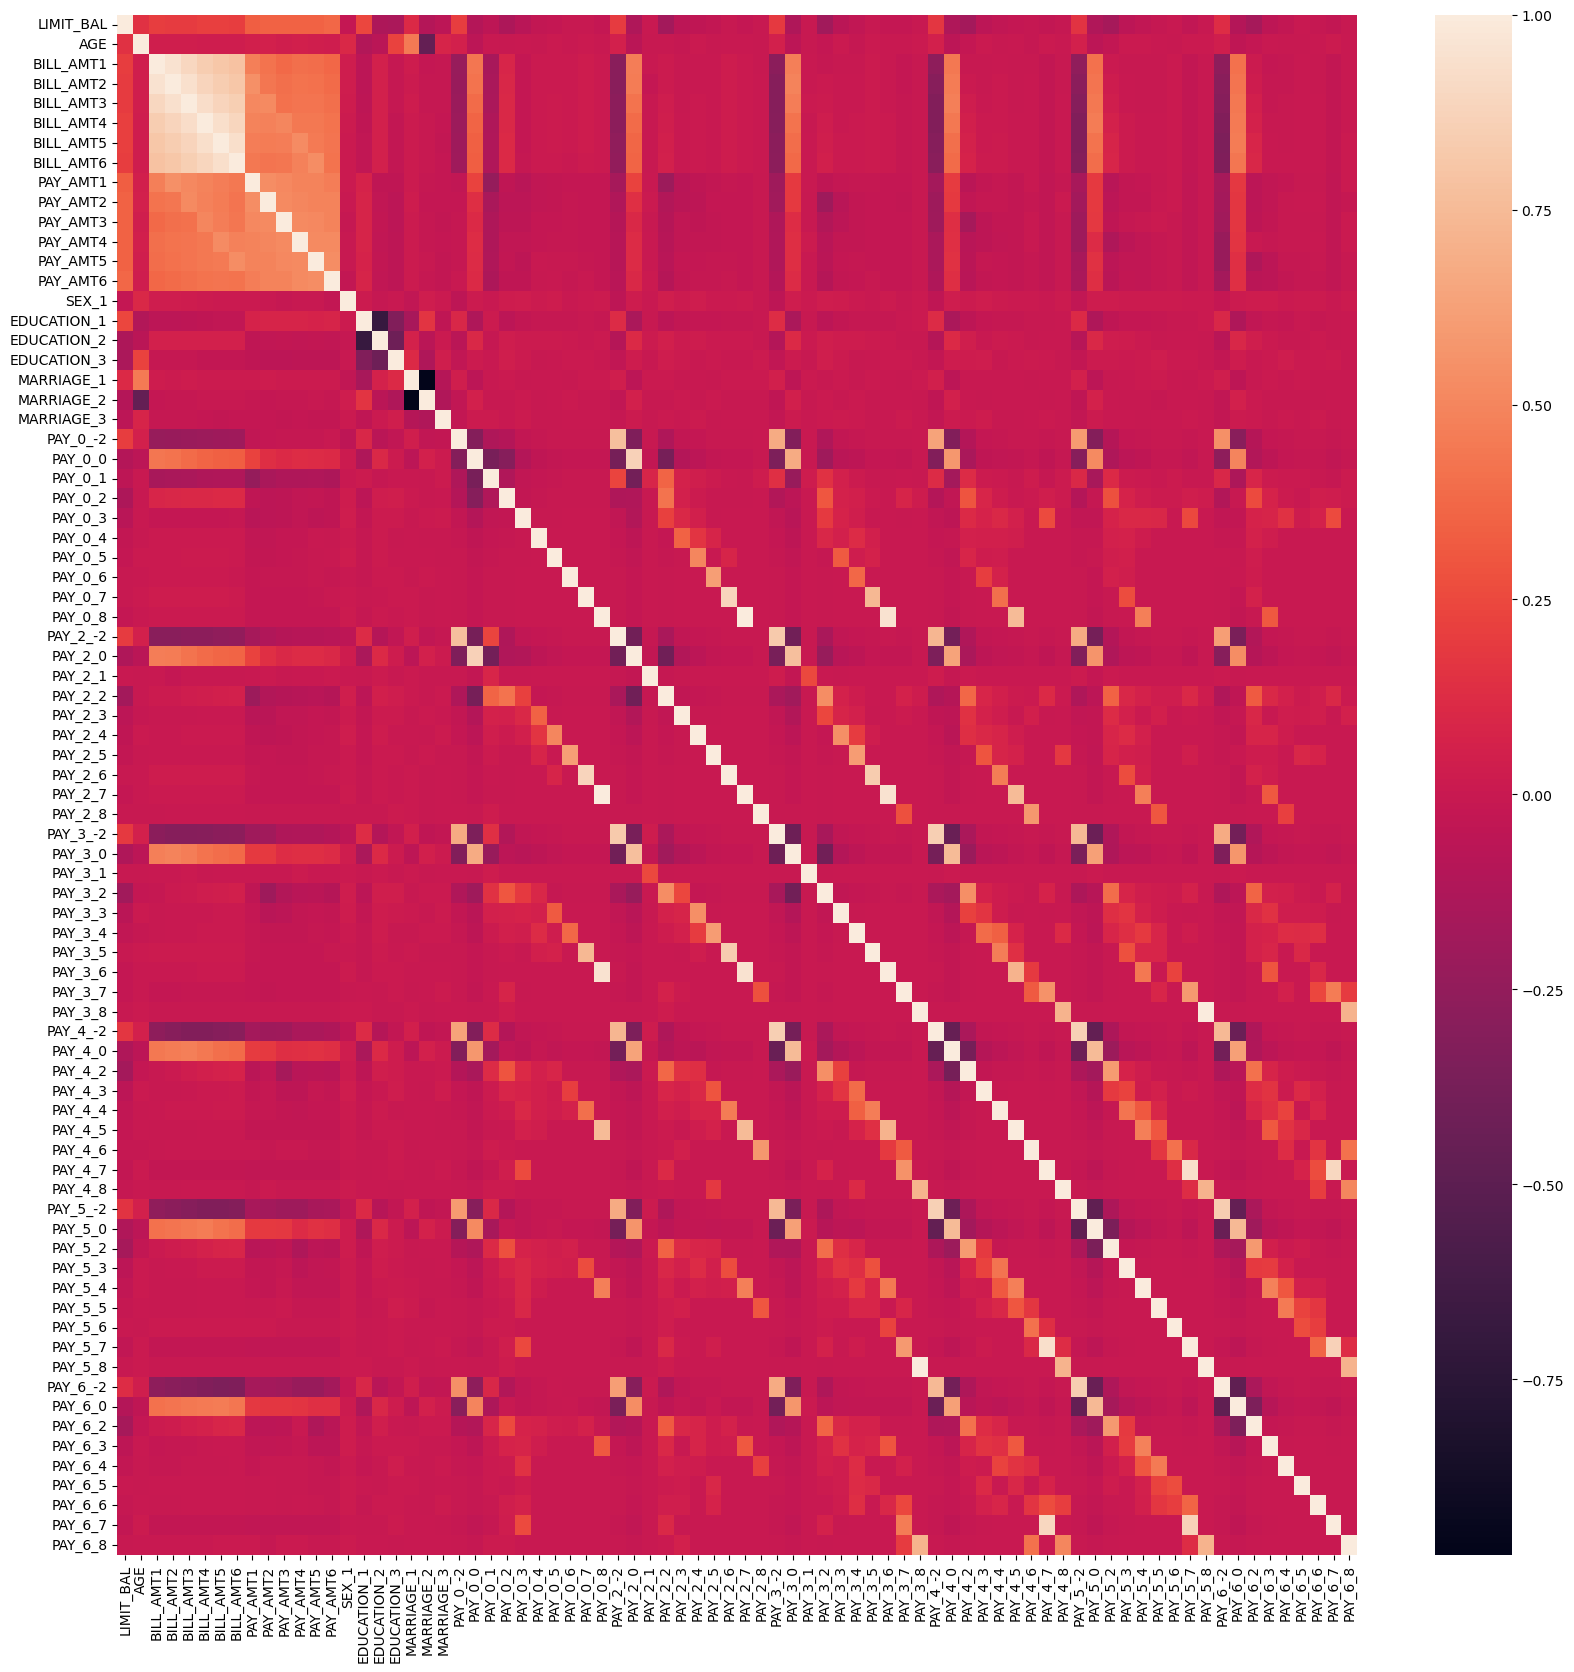

In [69]:
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(corr)

### Information Gain

In [65]:
from sklearn.feature_selection import mutual_info_classif

In [66]:
mutual_info=mutual_info_classif(X_train,y_train)

mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

PAY_0_2        0.055508
PAY_2_2        0.037027
PAY_3_2        0.032525
PAY_4_2        0.028795
PAY_AMT1       0.026780
                 ...   
EDUCATION_3    0.000000
PAY_0_7        0.000000
PAY_0_6        0.000000
PAY_0_4        0.000000
PAY_2_7        0.000000
Length: 78, dtype: float64

Pay related columns have a relative high mutual information. Lets remove the features that have 0 mutual information.

In [120]:
features = X_train.columns[(mutual_data.values!=0)]

In [122]:
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

# Model

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [124]:
classifier = LogisticRegression(max_iter = 200)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_train)

In [125]:
def output_result(y,y_pred):
    print('Confusion Matrix')
    print(confusion_matrix(y,y_pred))
    print(f'Accuracy : {accuracy_score(y,y_pred)}')
    print(f'Auc score Train: {roc_auc_score(y,y_pred)}')
    print(classification_report(y,y_pred))

In [129]:
output_result(y_train,y_pred)

Confusion Matrix
[[11664   564]
 [ 2284  1238]]
Accuracy : 0.8191746031746032
Auc score Train: 0.6526905880825362
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12228
           1       0.69      0.35      0.47      3522

    accuracy                           0.82     15750
   macro avg       0.76      0.65      0.68     15750
weighted avg       0.80      0.82      0.80     15750



In [130]:
y_pred = classifier.predict(X_val)
output_result(y_val,y_pred)

Confusion Matrix
[[3909  218]
 [ 719  404]]
Accuracy : 0.8215238095238095
Auc score Train: 0.6534638970478924
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4127
           1       0.65      0.36      0.46      1123

    accuracy                           0.82      5250
   macro avg       0.75      0.65      0.68      5250
weighted avg       0.80      0.82      0.80      5250



Looking at the accuracy, precision, and recall and compare the result from predicting the training and validation set, the model looks underfit so we need to find a way to improve the model by changing the parameter(penalty, C, solver, and max_iter).

Lets tune the parameters using pipeline and GridSearchCV to find the best parameter for the model.

We can tune penalty, solver, max_iter, and C.

In [127]:
# Create a pipeline
pipe = Pipeline([("classifier", LogisticRegression())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
               {"classifier": [LogisticRegression()],
                "classifier__penalty": ['l1'],
                "classifier__C": np.linspace(0.1, 4, 16),
                "classifier__solver":['saga','liblinear']
               },
              {"classifier": [LogisticRegression()],
               "classifier__penalty": ['l2'],
               "classifier__C": np.linspace(0.1, 4, 16),
               "classifier__solver":['newton-cg','saga','sag','liblinear']}
]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train)

In [131]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_train,y_train))

Pipeline(steps=[('classifier', LogisticRegression(C=0.1, solver='liblinear'))])
The mean accuracy of the model is: 0.8194920634920635


In [132]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_val,y_val))

Pipeline(steps=[('classifier', LogisticRegression(C=0.1, solver='liblinear'))])
The mean accuracy of the model is: 0.8211428571428572


The result when predicting X_val is similiar like when we predict the X_train, I can conclude that our model still underfitting and need further exploration to improve the model. We need to handle the skewedness when we use logistic regression since the algorithm is not robust to it.Therefore, I'm trying to use other algorithm like ensemble algorithm that can handle skewdness.

In [181]:
from sklearn.feature_extraction import DictVectorizer as dv
import xgboost as xgb
from xgboost import XGBClassifier

In [182]:
ensemble = XGBClassifier()
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_train)

In [183]:
output_result(y_train,y_pred)

Confusion Matrix
[[12087   141]
 [ 1277  2245]]
Accuracy : 0.909968253968254
Auc score Train: 0.8129455033522638
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12228
           1       0.94      0.64      0.76      3522

    accuracy                           0.91     15750
   macro avg       0.92      0.81      0.85     15750
weighted avg       0.91      0.91      0.90     15750



In [184]:
y_pred = ensemble.predict(X_val)
output_result(y_val,y_pred)

Confusion Matrix
[[3868  259]
 [ 694  429]]
Accuracy : 0.8184761904761905
Auc score Train: 0.6596275078372105
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4127
           1       0.62      0.38      0.47      1123

    accuracy                           0.82      5250
   macro avg       0.74      0.66      0.68      5250
weighted avg       0.80      0.82      0.80      5250



There is huge difference between the result from predicting training and validation data so we have overfitting model and needed to be hyperparameters tuning.

In [185]:
# Create a pipeline
pipe = Pipeline([("ensemble", XGBClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
               {"ensemble": [XGBClassifier()],
                "ensemble__eta":[0.05,0.01,0.1,0.3],
                "ensemble__max_depth":[3,4,6,10],
                "ensemble__min_child_weight":[1,10,20,30],
               }
]

# Create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train)

In [186]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_train,y_train))

Pipeline(steps=[('ensemble',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eta=0.1,
                               eval_metric=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.100000001, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=4, max_leaves=0, min_child_weight=10,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0, ...))])
The mean a

In [187]:
print("The mean accuracy of the model is:",best_model.score(X_val,y_val))

The mean accuracy of the model is: 0.8243809523809524


We got better result using xgboost instead of using logistic regression so we will use this for our final model.

In [190]:
y_pred = best_model.predict_proba(X_test)

In [189]:
output_result(y_test,y_pred)

Confusion Matrix
[[3119  152]
 [ 561  368]]
Accuracy : 0.8302380952380952
Auc score Train: 0.6748279478563453
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3271
           1       0.71      0.40      0.51       929

    accuracy                           0.83      4200
   macro avg       0.78      0.67      0.70      4200
weighted avg       0.82      0.83      0.81      4200



Using predit_proba, we also can classify the credit class into 5 categories.


In [198]:
credit_class = best_model.predict_proba(X_test)[:,1]

In [201]:
credit_class = credit_class*550+300

In [195]:
def credit_classifier(credit_class):
    if credit_class>750:
        return 'Kredit Luar Biasa'
    elif credit_class>700:
        return 'Kredit Bagus'
    elif credit_class>650:
        return 'Kredit yang Adil'
    elif credit_class>600:
        return 'Kredit Buruk'
    else:
        return 'Kredit Macet'

In [211]:
pd.Series(credit_class).apply(credit_classifier).value_counts()

Kredit Macet         3739
Kredit yang Adil      166
Kredit Buruk          121
Kredit Bagus          120
Kredit Luar Biasa      54
dtype: int64

Now we want to know what is our real accuracy in our model so we can use cross validation. We use the stratified cv since our data is imbalanced.

In [214]:
from sklearn.model_selection import StratifiedKFold

In [220]:
skfold=StratifiedKFold(n_splits=5)
scores=cross_val_score(best_model,X_test,y_test,cv=skfold)

In [221]:
scores

array([0.81071429, 0.82738095, 0.8202381 , 0.81785714, 0.83214286])

In [225]:
print('Highest Accuracy: ',max(scores))
print('Lowest Accuracy: ',min(scores))
print('Mean Accuracy: ',np.mean(scores))

Highest Accuracy:  0.8321428571428572
Lowest Accuracy:  0.8107142857142857
Mean Accuracy:  0.8216666666666667
